In [58]:
# Question1
import numpy as np
import pandas as pd

# get needed feature set, the size should be (6000, 784)
feature_set = pd.read_csv('mnist.csv', header=None).to_numpy()
feature_set = feature_set[:, 1:]

# subtract mean
subtract_mean_fs = feature_set - np.mean(feature_set, axis = 0)

# calculate the covariance matrix for original da
org_cov = np.cov(subtract_mean_fs, rowvar = False)

# get eigenvalues and eigenvectors
e_value, e_vector = np.linalg.eig(n)

# sort eigenvalues and eigenvectors
v_order = np.argsort(v)[::-1]
e_value = e_value[v_order]
e_vector = e_vector[:, index_sort]

# Obtain P with its row vectors corresponding to the top 10 eigenvectors
p = subtract_mean_fs.dot((e_vector.T[:][:10]).T)

# print covariance matrix
print("The covariance matrix of the transformed data:")
print(np.cov(p, rowvar = False))

The covariance matrix of the transformed data:
[[ 5.30434537e+00+0.j -4.39425496e-16+0.j  3.69780700e-15+0.j
   4.79104078e-16+0.j  3.55330590e-18+0.j  4.63114202e-16+0.j
   6.41963932e-16+0.j  8.84773168e-16+0.j  1.25550142e-15+0.j
  -2.40440366e-16+0.j]
 [-4.39425496e-16+0.j  3.87623390e+00+0.j  8.30881362e-16+0.j
  -1.39289591e-15+0.j  3.42301801e-16+0.j -2.93739954e-16+0.j
  -2.20304966e-16+0.j  8.90103127e-16+0.j  2.54653589e-16+0.j
   6.84011385e-16+0.j]
 [ 3.69780700e-15+0.j  8.30881362e-16+0.j  3.28640165e+00+0.j
   4.14848463e-16+0.j  7.33165450e-16+0.j  1.13343055e-15+0.j
   6.91117997e-16+0.j -3.07990191e-16+0.j  8.64637768e-17+0.j
  -3.55330590e-16+0.j]
 [ 4.79104078e-16+0.j -1.39289591e-15+0.j  4.14848463e-16+0.j
   2.91196053e+00+0.j  1.25846250e-15+0.j  2.12000964e-15+0.j
  -2.57614677e-16+0.j  3.64361909e-16+0.j  1.94247389e-16+0.j
   6.43000313e-16+0.j]
 [ 3.55330590e-18+0.j  3.42301801e-16+0.j  7.33165450e-16+0.j
   1.25846250e-15+0.j  2.48576369e+00+0.j  2.91371084e-

Converged in 55 iterations
Loss value for each iteration: [430876.3266349828, 251924.11999224048, 244436.2583618298, 241372.80759227756, 238697.18200266434, 236612.01015450543, 235578.2112784966, 235093.29729428748, 234814.65598443276, 234588.18009877563, 234377.89193573952, 234192.7514487915, 234051.07564930455, 233897.3579130861, 233761.99038995142, 233583.34655787816, 233364.1703744704, 233161.4352108468, 233021.786973523, 232940.902309587, 232894.93126673053, 232861.60560344375, 232825.41732937354, 232783.4150039855, 232742.72252028983, 232694.49310152695, 232658.34679537412, 232632.07081600893, 232608.0901020166, 232571.3633489963, 232531.76158137387, 232491.85131137975, 232444.59779094954, 232381.75116075895, 232320.74262549402, 232252.9318693566, 232173.90924738915, 232118.86053622846, 232092.64589721817, 232073.35943143012, 232058.1829430864, 232044.24081817386, 232036.69225902393, 232031.59454115745, 232025.95796481863, 232020.9035539056, 232018.08256233533, 232015.96784068496

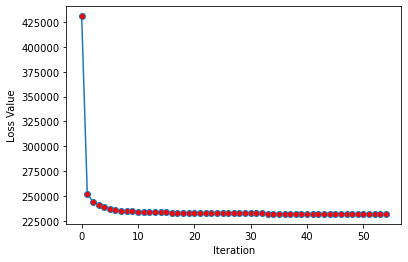

In [63]:
# Question 2
import numpy as np
import pandas as pd
import random

# get needed feature set, the size should be (6000, 784)
feature_set = pd.read_csv('mnist.csv', header=None).to_numpy()
feature_set = feature_set[:, 1:]

# set centroid number as 10
centroid_num = 10

# get 10 different numbers from 0 to 5999
rd_arr = random.sample(range(0, len(feature_set)), centroid_num)

# get random 10 centroids
centroids = []
for i in rd_arr:
    centroids.append(feature_set[i])
centroids = np.asarray(centroids)

# record cycle number
iteration = 0

while(True):
    iteration = iteration + 1
    
    # assign data to different clusters
    cluster_number_set = []

    # iterate the feature set
    for i in range(len(feature_set)):
        # set distance_list to empty
        distance_list = []

        # compare the distance with centroids
        for j in range(centroid_num):
            distance_list.append(np.linalg.norm(feature_set[i] - centroids[j]))

        # append each datum's cluster 
        cluster_number_set.append(np.argmin(distance_list))

    cluster_number_set = np.asarray(cluster_number_set)

    # feature set seperate by clusters
    feature_set_split = [[] for i in range(centroid_num)]

    # insert value in feature_set_split
    for i in range(len(feature_set)):
        feature_set_split[cluster_number_set[i]].append(feature_set[i])

    feature_set_split = np.asarray(feature_set_split)

    centroids_new = []
    for i in feature_set_split:
        centroids_new.append(np.mean(i, axis = 0))
        
    centroids_new = np.asarray(centroids_new)
    
    if np.array_equal(centroids_new, centroids):
        if iteration > 1:
            print("Converged in", iteration, "iterations")
        else:
            print("Converged in", iteration, "iteration")
            
        print("Cluster number:")
        print(cluster_number_set)
        break
    else:
        centroids = centroids_new


Converged in 40 iterations
Cluster number:
[8 2 7 0 1 3 9 8 9 6 8 9 8 4 9 6 3 3 9 6 7 2 6 0 9 3 1 8 6 0 9 3 4 6 2 9 4
 2 1 4 9 3 9 6 9 1 8 9 9 8 8 5 1 9 1 6 5 6 7 0 7 0 4 2 7 9 4 0 5 2 9 6 9 4
 8 2 8 0 0 6 8 2 3 4 1 3 9 6 5 6 4 6 7 4 3 2 1 3 8 0 9 1 9 6 9 0 4 8 5 9 7
 8 9 0 5 6 1 3 5 2 8 5 0 6 9 3 4 6 9 4 8 6 9 1 7 8 8 0 8 6 9 6 1 7 8 9 3 4
 6 8 9 4 9 6 1 4 5 3 7 3 1 3 1 0 7 4 6 6 0 2 1 3 1 9 9 9 1 0 2 8 9 1 8 1 9
 6 4 3 3 4 4 9 2 6 7 6 7 3 8 3 9 0 3 3 4 0 5 3 9 5 8 9 9 3 1 8 8 1 4 2 3 4
 7 6 6 3 1 1 7 5 6 9 4 3 2 8 2 1 4 9 9 7 8 6 8 3 5 1 9 5 7 9 9 3 8 3 9 1 6
 9 9 4 9 6 7 3 8 1 9 0 9 1 1 9 9 1 9 3 4 8 1 8 7 5 8 1 4 9 1 1 0 8 1 5 7 3
 5 1 8 4 0 6 4 2 1 6 5 6 3 0 9 4 8 6 7 0 8 3 0 6 2 8 7 4 1 3 2 3 2 1 8 4 8
 8 7 9 1 6 1 3 1 8 1 3 7 0 1 3 3 6 1 0 8 6 1 0 8 0 9 5 9 3 1 6 1 3 9 4 9 1
 9 1 1 6 1 3 8 6 3 6 7 3 9 6 1 3 8 6 9 6 8 3 8 3 9 4 8 0 9 2 4 4 1 9 8 8 9
 9 9 6 0 6 9 6 4 3 0 9 9 6 1 4 9 6 7 3 1 2 7 5 4 4 3 8 7 5 1 9 7 3 5 1 1 0
 9 3 7 0 3 4 9 2 8 2 9 0 9 3 5 1 7 1 5 9 5 4 0 6 7 6 9 6 

Converged in 62 iterations
Loss value for each iteration: [402990.4183519215, 253290.72461860406, 244847.78221064573, 239600.57528103775, 237376.87730311547, 236455.49449861923, 235990.75593204898, 235657.81708533948, 235361.74353629828, 235015.43935978954, 234541.45719780706, 234108.42748171336, 233864.13314418937, 233737.19345394478, 233685.72064517456, 233641.67899259776, 233592.5865759776, 233552.32106836815, 233518.80742174003, 233496.9360448813, 233486.53039914332, 233473.07485373883, 233453.5992365699, 233436.6988299243, 233421.72808782686, 233404.3654053631, 233371.65323604937, 233338.02459057095, 233322.34640244732, 233310.61829055275, 233297.6928703332, 233284.95200287594, 233271.54711007397, 233262.3710510021, 233254.47005849835, 233241.64047693374, 233226.65053235518, 233210.68923621753, 233199.15105919255, 233188.16718335776, 233180.23110785274, 233172.1621431721, 233166.64133527575, 233157.94201322124, 233152.83370489356, 233144.47946045297, 233131.08369827076, 233117.667

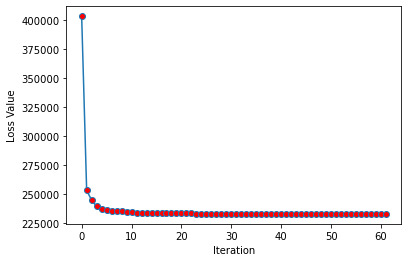

In [65]:
# Question 3
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# get needed feature set, the size should be (6000, 784)
feature_set = pd.read_csv('mnist.csv', header=None).to_numpy()
feature_set = feature_set[:, 1:]

# set centroid number as 10
centroid_num = 10

# get 10 different numbers from 0 to 5999
rd_arr = random.sample(range(0, len(feature_set)), centroid_num)

# get random 10 centroids
centroids = []
for i in rd_arr:
    centroids.append(feature_set[i])
centroids = np.asarray(centroids)

# record cycle number
iteration = 0

loss_value_set = []

while(True):
    iteration = iteration + 1
    loss_value = 0
    
    # assign data to different clusters
    cluster_number_set = []

    # iterate the feature set
    for i in range(len(feature_set)):
        # set distance_list to empty
        distance_list = []

        # compare the distance with centroids
        for j in range(centroid_num):
            distance_list.append(np.linalg.norm(feature_set[i] - centroids[j]))

        # append each datum's cluster 
        cluster_num = np.argmin(distance_list)
        cluster_number_set.append(cluster_num)
        loss_value = loss_value + np.linalg.norm(feature_set[i] - centroids[cluster_num]) ** 2

    cluster_number_set = np.asarray(cluster_number_set)
    loss_value_set.append(loss_value)

    # feature set seperate by clusters
    feature_set_split = [[] for i in range(centroid_num)]

    # insert value in feature_set_split
    for i in range(len(feature_set)):
        feature_set_split[cluster_number_set[i]].append(feature_set[i])

    feature_set_split = np.asarray(feature_set_split)

    centroids_new = []
    for i in feature_set_split:
        centroids_new.append(np.mean(i, axis = 0))
        
    centroids_new = np.asarray(centroids_new)
    
    if np.array_equal(centroids_new, centroids):
        if iteration > 1:
            print("Converged in", iteration, "iterations")
        else:
            print("Converged in", iteration, "iteration")
        
        print("Loss value for each iteration:", loss_value_set)
        plt.plot(loss_value_set, marker = 'o', markerfacecolor = 'red')
        plt.xlabel("Iteration")
        plt.ylabel("Loss Value")
        plt.show()
        break
    else:
        centroids = centroids_new

The best k in k-means algorithm is: 6
Loss value for training set: [194964.95257833184, 177306.2933755964, 165554.92517815778, 159327.5470377545, 153591.98665433392, 150146.99416760282, 144617.45205898795, 143039.12806273263, 139595.00783342242, 136074.55367152966]


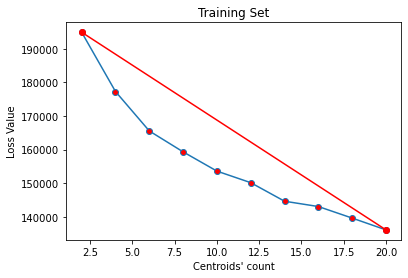

In [16]:
# Question 4
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# calculate a point (x, y) to a line's (ax + by = c) y difference
# used for finding the elbow
def get_ydiff(a, b, c, x, y):
    return abs((a * x + b * y + c) / b)

# method to get best k
# logic: if the ratio of difference is the largest, set this k to best k
def get_best_k(loss_value_set, centroid_num_list):
    # find the first and last loss value
    loss_value_first = loss_value_set[0]
    loss_value_last = loss_value_set[-1]
    
    # find the first and last k value
    k_first = centroid_num_list[0]
    k_last = centroid_num_list[-1]
    
    # calculate a, b, and c
    a = loss_value_first - loss_value_last
    b = k_last - k_first
    c = loss_value_last * k_first - loss_value_first * k_last
    
    ydiff_list = []
    for i in range(len(centroid_num_list)):
        ydiff_list.append(get_ydiff(a, b, c, centroid_num_list[i], loss_value_set[i]))
    
    max_index = ydiff_list.index(max(ydiff_list))

    return centroid_num_list[max_index]

# get needed feature set, the size should be (6000, 784)
feature_set = pd.read_csv('mnist.csv', header=None).to_numpy()
feature_set = feature_set[:, 1:]

# init training set and testing set
training_set = feature_set[0:4000]
testing_set = feature_set[4000:6001]

# initialise centroid number as 0
centroid_num = 0

# store centroids for all k values
centroids_all_ks = []

loss_value_set = []
centroid_num_list = []

# training centroid number from 2 to 20 and step is 2 
for k in range(2, 21, 2):
    # set centroid number
    centroid_num = centroid_num + 2
    centroid_num_list.append(centroid_num)

    # get different numbers from 0 to 3999
    rd_arr = random.sample(range(0, len(training_set)), centroid_num)

    # get random centroids
    centroids = []

    for i in rd_arr:
        centroids.append(training_set[i])
    centroids = np.asarray(centroids)

    # record cycle number
    iteration = 0

    while(True):
        iteration = iteration + 1
        loss_value = 0

        # assign data to different clusters
        cluster_number_set = []

        # iterate the feature set
        for i in range(len(training_set)):
            # set distance_list to empty
            distance_list = []

            # compare the distance with centroids
            for j in range(centroid_num):
                distance_list.append(np.linalg.norm(training_set[i] - centroids[j]))

            # append each datum's cluster 
            cluster_num = np.argmin(distance_list)
            cluster_number_set.append(cluster_num)
            loss_value = loss_value + np.linalg.norm(training_set[i] - centroids[cluster_num]) ** 2

        cluster_number_set = np.asarray(cluster_number_set)

        # training set seperate by clusters
        training_set_split = [[] for i in range(centroid_num)]

        # insert value in training_set_split
        for i in range(len(training_set)):
            training_set_split[cluster_number_set[i]].append(training_set[i])

        training_set_split = np.asarray(training_set_split)

        centroids_new = []
        for i in training_set_split:
            centroids_new.append(np.mean(i, axis = 0))

        centroids_new = np.asarray(centroids_new)

        if np.array_equal(centroids_new, centroids):
            loss_value_set.append(loss_value)
            centroids_all_ks.append(centroids)

            break
        else:
            centroids = centroids_new

best_k = get_best_k(loss_value_set, centroid_num_list)
print("The best k in k-means algorithm is:", best_k)
print("Loss value for training set:", loss_value_set)
plt.plot(centroid_num_list, loss_value_set, marker = 'o', markerfacecolor = 'red')
plt.plot([centroid_num_list[0], centroid_num_list[-1]], [loss_value_set[0], loss_value_set[-1]], '-ro')
plt.xlabel("Centroids' count")
plt.ylabel("Loss Value")
plt.title("Training Set")
plt.show()

Loss value for testing set: [101003.23725547334, 92164.19401714405, 85749.78122064001, 82464.59953561297, 79736.66737077893, 78119.15647187052, 75208.63900070383, 74543.77558434125, 72901.49896880839, 71098.24614641488]


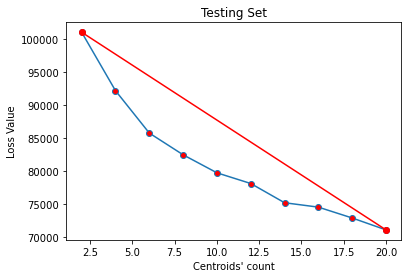

In [17]:
# still question 4 (validation part)
# use centroids in testing part to validate
loss_value_set = []

# iterates 10 times
for k in range(len(centroids_all_ks)):
    loss_value = 0
    centroids = centroids_all_ks[k]
    
    for i in range(len(testing_set)):
        distance_list = []
        
        for j in range(len(centroids)):
            distance_list.append(np.linalg.norm(testing_set[i] - centroids[j]))
        index = np.argmin(distance_list)
        loss_value = loss_value + np.linalg.norm(testing_set[i] - centroids[index]) ** 2 # calculating the loss_value
    loss_value_set.append(loss_value)

print("Loss value for testing set:", loss_value_set)
plt.plot(centroid_num_list, loss_value_set, marker = 'o', markerfacecolor = 'red')
plt.plot([centroid_num_list[0], centroid_num_list[-1]], [loss_value_set[0], loss_value_set[-1]], '-ro')
plt.xlabel("Centroids' count")
plt.ylabel("Loss Value")
plt.title("Testing Set")
plt.show()